# Exercise 9

In [92]:
import pandas as pd
import numpy as np
from svmutil import *
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from nltk.corpus import stopwords

## SVM classification using libsvm:

In [9]:
data = pd.read_csv("Spambase D3/spambase.data",header=None)

## To convert the data into libsvm format:

In [1]:
def svm_format(data):
    data = np.array(data)
    file = open("d3.File","w")
    for i in data:
        if i[-1] == 1:
            file.write("+1 ")
        else:
            file.write("-1 ")
        for j in range(len(i)-2):
            if i[j] != 0:
                file.write(str(j+1)+":"+str(i[j])+" ")

        file.write("\n")
    file.close()

### To check if the dataset format is correct:

\begin{align}\\
{python\     checkdataset.py\     d3.File} \\\\
\end{align}

## Train, Validation and Test split:

For splitting the data into train,validation, the following command was used in the python console to use the file "subset.py"

\begin{align}\\
{python\     subset.py\     d3.File\     900\     Test.File\     Train.File} \\\\
{python\     subset.py\     Train.File\     700\     Val.File\     Train.File} \\
\end{align}

## To build a Spam filter using libsvm:

In [18]:
train_y,train_x = svm_read_problem("Train.File")
val_y,val_x = svm_read_problem("Val.File")
test_y,test_x = svm_read_problem("Test.File")
crange = np.linspace(0.2,20,100)
f1score = []
accuracy_pred = []
mse_pred = []
bestmodel = None
MSE = 0
for i in crange:
    print("C: ",round(i,2))
    m = svm_train(train_y,train_x,'-c '+str(i))
    pred_label, pred_acc, pred_val = svm_predict(val_y,val_x,m )
    f1score.append(f1_score(val_y, pred_label))
    accuracy_pred.append(pred_acc[0])
    mse_pred.append(pred_acc[1])
    
    if bestmodel == None or MSE > pred_acc[1]: 
        bestmodel = m
        MSE = pred_acc[1]

C:  0.2
Accuracy = 76.8571% (538/700) (classification)
C:  0.4
Accuracy = 78.4286% (549/700) (classification)
C:  0.6
Accuracy = 79.8571% (559/700) (classification)
C:  0.8
Accuracy = 81% (567/700) (classification)
C:  1.0
Accuracy = 82.7143% (579/700) (classification)
C:  1.2
Accuracy = 83% (581/700) (classification)
C:  1.4
Accuracy = 83.2857% (583/700) (classification)
C:  1.6
Accuracy = 83.4286% (584/700) (classification)
C:  1.8
Accuracy = 83.8571% (587/700) (classification)
C:  2.0
Accuracy = 83.4286% (584/700) (classification)
C:  2.2
Accuracy = 83.2857% (583/700) (classification)
C:  2.4
Accuracy = 83.4286% (584/700) (classification)
C:  2.6
Accuracy = 83.7143% (586/700) (classification)
C:  2.8
Accuracy = 83.5714% (585/700) (classification)
C:  3.0
Accuracy = 83.4286% (584/700) (classification)
C:  3.2
Accuracy = 83.4286% (584/700) (classification)
C:  3.4
Accuracy = 83.4286% (584/700) (classification)
C:  3.6
Accuracy = 83.4286% (584/700) (classification)
C:  3.8
Accuracy = 8

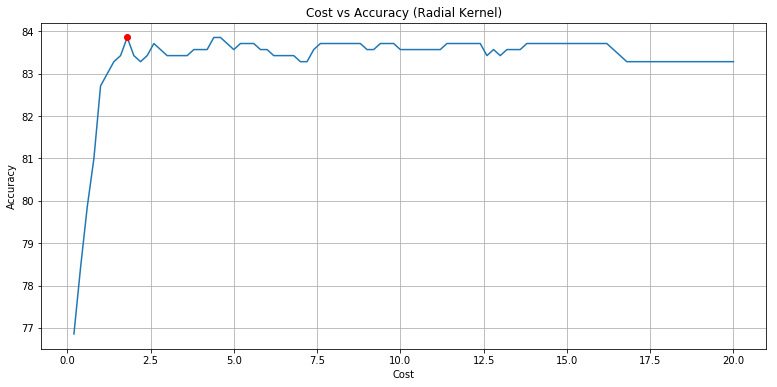

In [39]:
maxindex = accuracy_pred.index(max(accuracy_pred))
plt.figure(figsize=(13,6))
plt.plot(crange,accuracy_pred)
plt.plot(crange[maxindex],accuracy_pred[maxindex],'ro')
plt.title("Cost vs Accuracy (Radial Kernel)")
plt.xlabel("Cost")
plt.ylabel("Accuracy")
plt.grid()

In [1]:
minindex = mse_pred.index(min(mse_pred))
plt.figure(figsize=(13,6))
plt.plot(crange,mse_pred)
plt.plot(crange[minindex],mse_pred[minindex],'ro',label = str(crange[minindex]) + str(mse_pred[minindex]))
plt.title("Cost vs MSE (Radial Kernel)")
plt.xlabel("Cost")
plt.ylabel("MSE")
plt.grid()

NameError: name 'mse_pred' is not defined

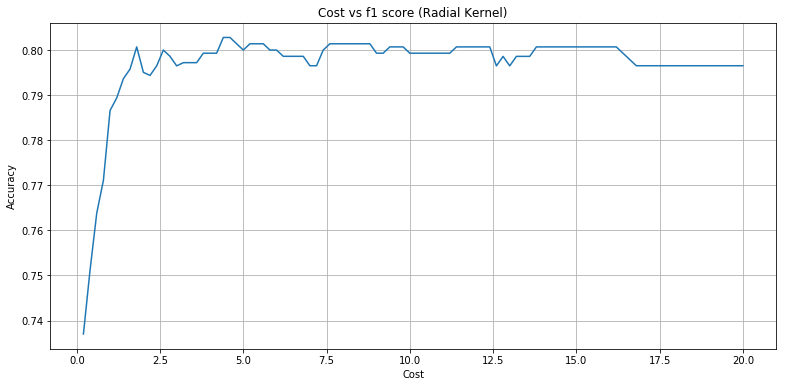

In [34]:
maxindex = f1score.index(max(f1score))
plt.figure(figsize=(13,6))
plt.plot(crange,f1score)
plt.title("Cost vs f1 score (Radial Kernel)")
plt.xlabel("Cost")
plt.ylabel("Accuracy")
plt.grid()

In [42]:
pred_label, pred_acc, pred_val = svm_predict(test_y,test_x,bestmodel)
bestmodel.param.C,bestmodel.param.kernel_type

Accuracy = 82.1111% (739/900) (classification)


(1.8, 2)

In [43]:
Predictionresult = pd.DataFrame()

In [50]:
Predictionresult["Ground Truth"] = test_y
Predictionresult["Prediction"] = pred_label
print("Best C: ",bestmodel.param.C,"\nKernel: Radial","\nAccuracy: ",round(pred_acc[0],3),"\nMSE: ",round(pred_acc[1],3))
Predictionresult.sample(20)

Best C:  1.8 
Kernel: Radial 
Accuracy:  82.111 
MSE:  0.716


,Ground Truth,Prediction
21,1.0,1.0
272,1.0,1.0
142,1.0,1.0
0,1.0,1.0
755,-1.0,-1.0
274,1.0,1.0
169,1.0,1.0
872,-1.0,1.0
663,-1.0,-1.0
885,-1.0,-1.0
